In [1]:
import sys
sys.path.append('..\\utils')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from MiguelTK import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/HR_capstone_dataset.csv')

In [5]:
exploracion_inicial(df)

|    |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   left |   promotion_last_5years | Department   | salary   |
|---:|---------------------:|------------------:|-----------------:|-----------------------:|---------------------:|----------------:|-------:|------------------------:|:-------------|:---------|
|  0 |                 0.38 |              0.53 |                2 |                    157 |                    3 |               0 |      1 |                       0 | sales        | low      |
|  1 |                 0.8  |              0.86 |                5 |                    262 |                    6 |               0 |      1 |                       0 | sales        | medium   |
|  2 |                 0.11 |              0.88 |                7 |                    272 |                    4 |               0 |      1 |                       0 | sales        | medium   |

|       |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   left |   promotion_last_5years | Department   | salary   |
|------:|---------------------:|------------------:|-----------------:|-----------------------:|---------------------:|----------------:|-------:|------------------------:|:-------------|:---------|
| 14996 |                 0.37 |              0.53 |                2 |                    143 |                    3 |               0 |      1 |                       0 | support      | low      |
| 14997 |                 0.11 |              0.96 |                6 |                    280 |                    4 |               0 |      1 |                       0 | support      | low      |
| 14998 |                 0.37 |              0.52 |                2 |                    158 |                    3 |               0 |      1 |                       0 | support      | low      |

|       |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   left |   promotion_last_5years | Department   | salary   |
|------:|---------------------:|------------------:|-----------------:|-----------------------:|---------------------:|----------------:|-------:|------------------------:|:-------------|:---------|
|  5031 |                 0.16 |              0.99 |                3 |                    213 |                    6 |               1 |      0 |                       1 | RandD        | medium   |
| 13866 |                 0.56 |              0.71 |                5 |                    244 |                    3 |               0 |      0 |                       0 | product_mng  | low      |
|   692 |                 0.84 |              0.86 |                5 |                    268 |                    5 |               0 |      1 |                       0 | marketing    | medium   |

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
-------------------------
Nulos
satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident          

# Contexto

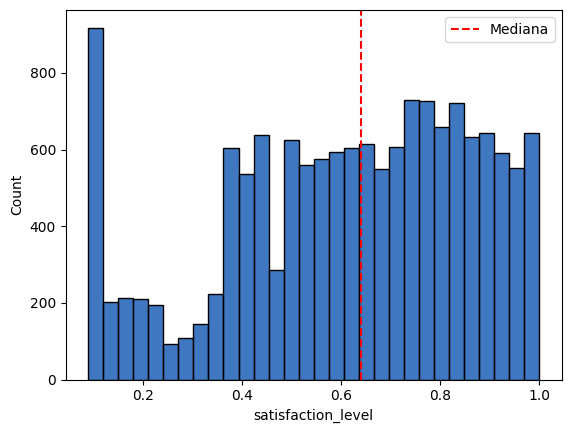

In [6]:
sns.histplot(
    data = df,
    x = 'satisfaction_level',
    color = palette[0]
)
plt.axvline(df['satisfaction_level'].median(),color='red',ls='--',label='Mediana')
plt.legend()

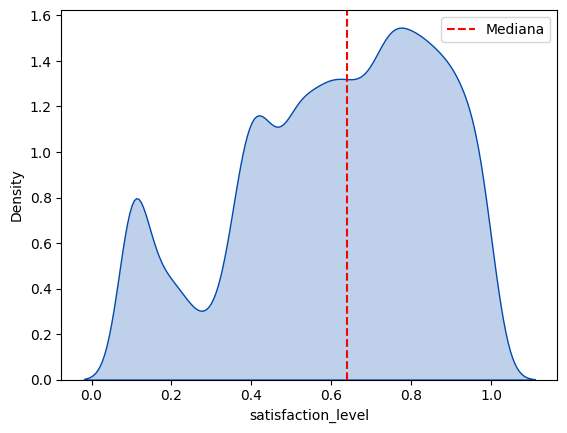

In [7]:
sns.kdeplot(
    data = df,
    x = 'satisfaction_level',
    color = palette[0],
    fill = True
)
plt.axvline(df['satisfaction_level'].median(),color='red',ls='--',label='Mediana')
plt.legend()

In [8]:
df['satisfaction_level'].mean()

0.6128335222348156

<Axes: xlabel='average_montly_hours', ylabel='Count'>

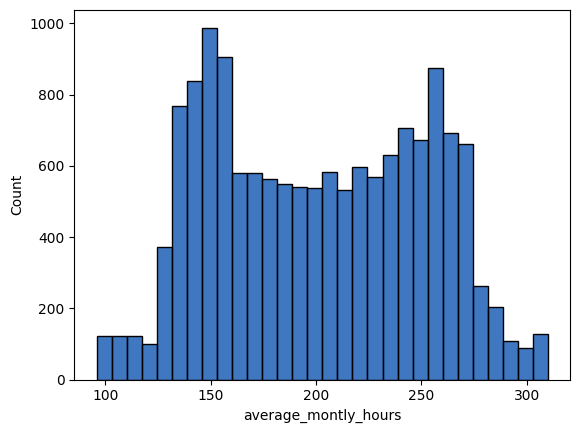

In [9]:
sns.histplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0]
)

<Axes: xlabel='average_montly_hours', ylabel='Density'>

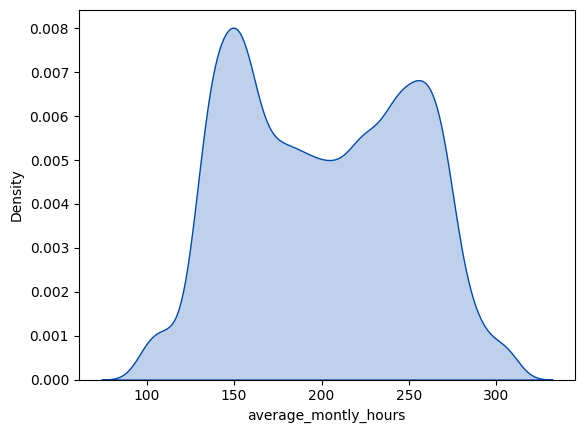

In [10]:
sns.kdeplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0],
    fill = True
)

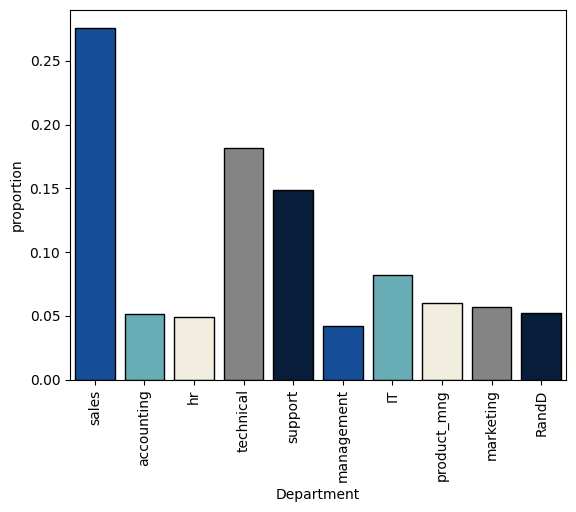

In [11]:
sns.countplot(
    data = df,
    x = 'Department',
    stat = 'proportion',
    **kwargs
)
rot_show()

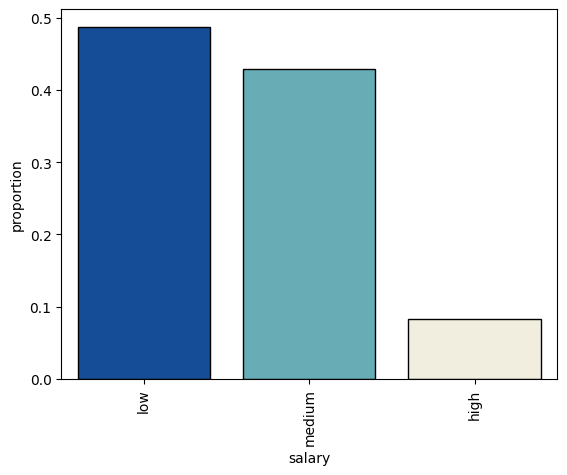

In [12]:
sns.countplot(
    data = df,
    x = 'salary',
    stat = 'proportion',
    **kwargs
)
rot_show()

In [13]:
df['delta'] = df['satisfaction_level'] - df['last_evaluation']

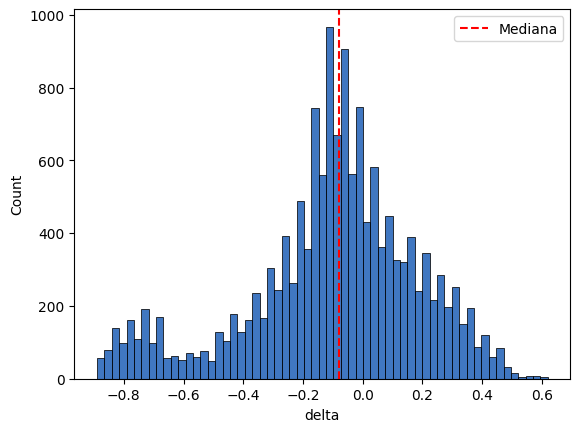

In [14]:
sns.histplot(
    data = df,
    x = 'delta',
    color = palette[0]
)
plt.axvline(df['delta'].median(),color='red',ls='--',label='Mediana')
plt.legend()

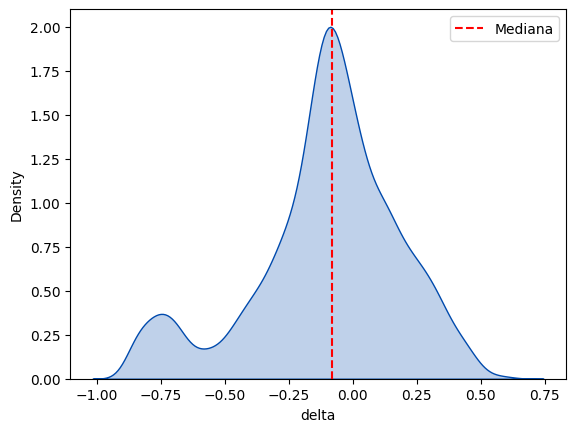

In [15]:
sns.kdeplot(
    data = df,
    x = 'delta',
    color = palette[0],
    fill = True
)
plt.axvline(df['delta'].median(),color='red',ls='--',label='Mediana')
plt.legend()

In [16]:
df['delta'].mean()

-0.10326821788119209

In [17]:
df['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

## Probabilidad de dejar la compañía 

In [18]:
variables = [
    'Department',
    'salary',
    'Work_accident',
    'promotion_last_5years'
]

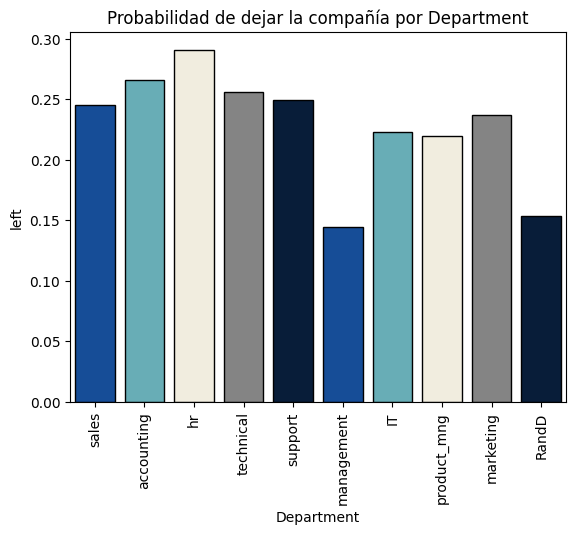

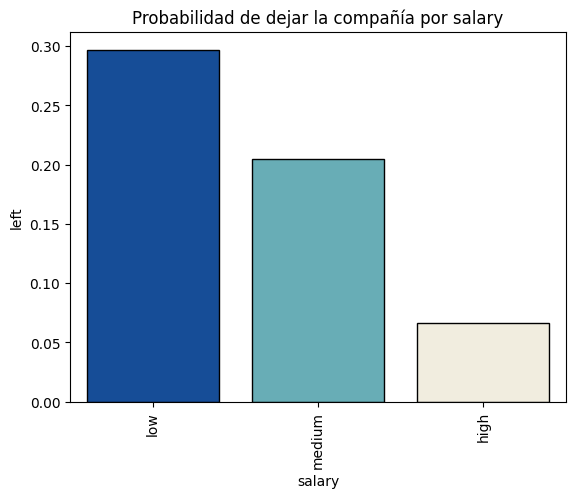

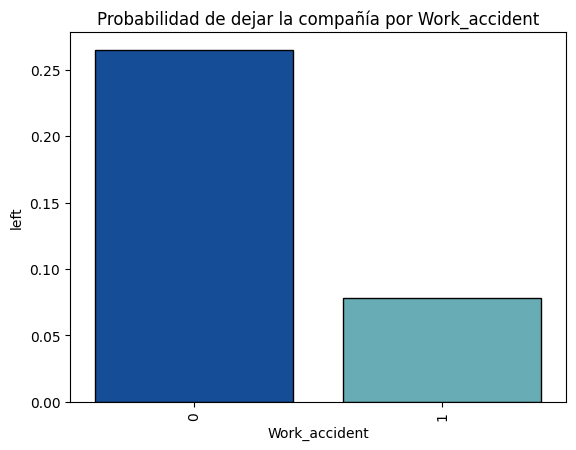

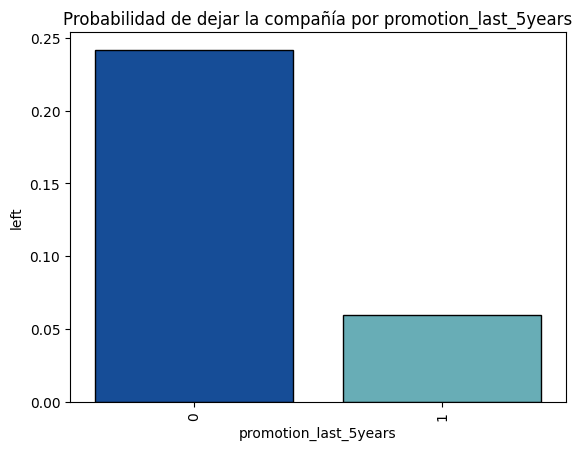

In [19]:
for var in variables:
    sns.barplot(
        data = df,
        x = var,
        y = 'left',
        estimator = 'mean', 
        errorbar = None,
        **kwargs
    )
    plt.title(f'Probabilidad de dejar la compañía por {var}')
    rot_show()

In [20]:
df_ = (
    df
    .groupby('promotion_last_5years')
    ['left']
    .mean()
)
df_[0] / df_[1]

4.062412161193174

## Correlación de las evaluaciones

In [21]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'delta'],
      dtype='object')

In [22]:
dep_vars = ['satisfaction_level','last_evaluation','delta']

<Axes: xlabel='feature'>

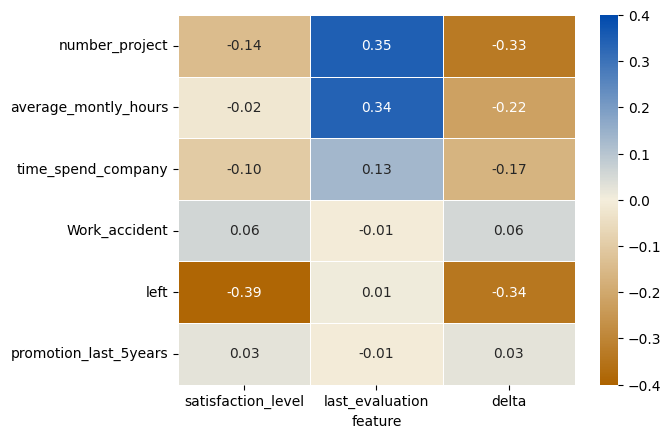

In [27]:
corr = (
    df
    .select_dtypes('number')
    .corr()
    .reset_index(names='feature')
    .query('feature.isin(@dep_vars)')
    .drop(columns=dep_vars)
    .set_index('feature')
    .transpose()
)

sns.heatmap(
    data = corr,
    annot = True,
    fmt='.2f',
    linewidths = .5,
    cmap = cmap,
    vmax = .4,
    vmin = -.4
)

### Número de proyectos

In [28]:
cat_vars = [
    'Work_accident',
    'left',
    'promotion_last_5years',
    'Department',
    'salary'
]

for var in cat_vars:
    df[var] = pd.Categorical(df[var])

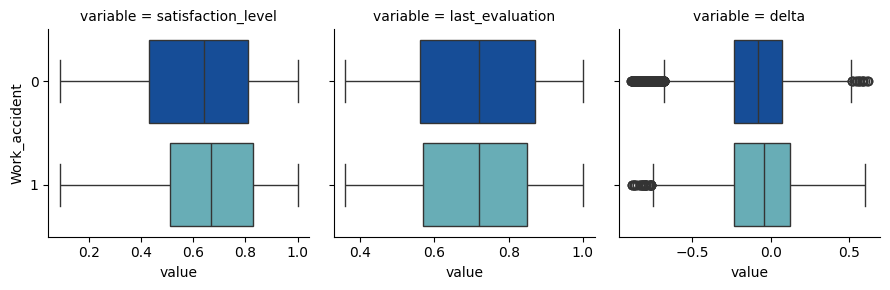

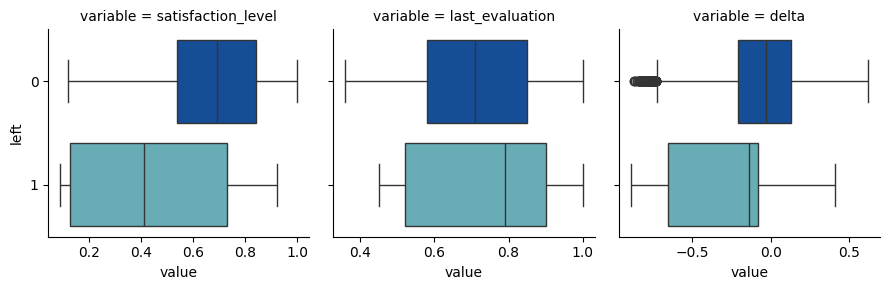

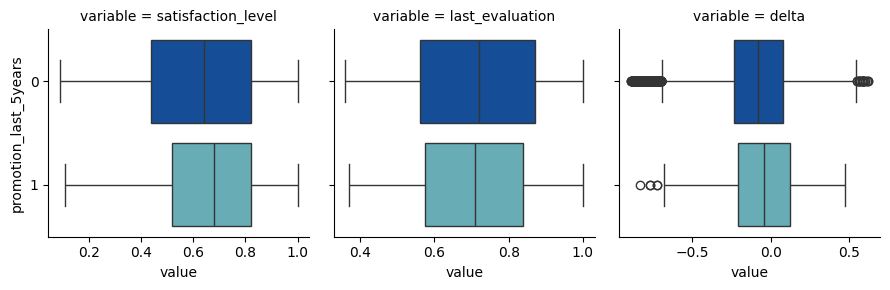

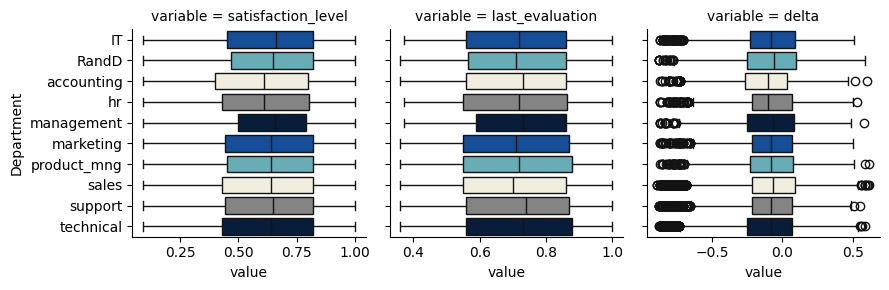

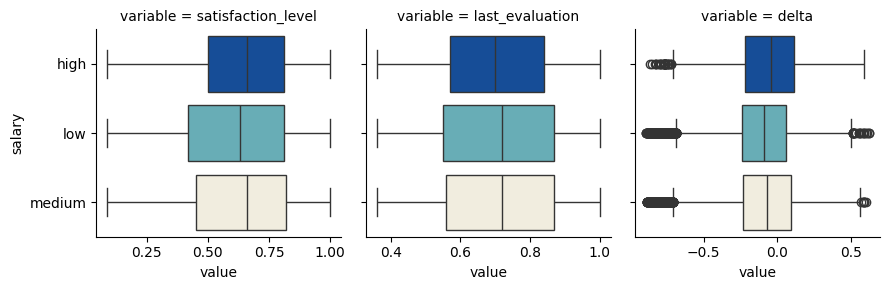

In [29]:
for var in cat_vars:
    df_ = (
        df
        [dep_vars + [var]]
        .melt(var)
    )
    grid = sns.FacetGrid(df_,col='variable',sharex=False)
    grid.map(sns.boxplot,'value',var,palette=palette)